# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [127]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import expon


In [128]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [129]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [130]:
df['Hemisfério'] = 0
df.loc[(df.Latitude > 0), "Hemisfério"] = "Norte"
df.loc[(df.Latitude < 0), "Hemisfério"] = "Sul"

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

5.5
9.1


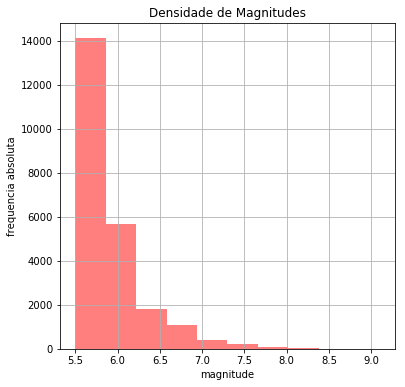

In [131]:
print(df.Magnitude.min())
print(df.Magnitude.max())
plot = df.Magnitude.plot.hist(title="Densidade de Magnitudes",figsize =(6,6),alpha=0.5,color=('red'))
plt.xlabel("magnitude")
plt.ylabel("frequencia absoluta")
plot.grid(1)

In [132]:
print("a partir do histograma, é possível observar que a maior parte dos abalos sismicos estão entre 5 e 6 graus,entre o 6 e o 7, é nitido que tende a ser muito menor a incidencia dos abalos,enquanto entre 7 e 8.5, quase nao ocorrem os abalos")

a partir do histograma, é possível observar que a maior parte dos abalos sismicos estão entre 5 e 6 graus,entre o 6 e o 7, é nitido que tende a ser muito menor a incidencia dos abalos,enquanto entre 7 e 8.5, quase nao ocorrem os abalos


Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [133]:
x, y = expon.fit(df["Magnitude"])
print(x, y)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

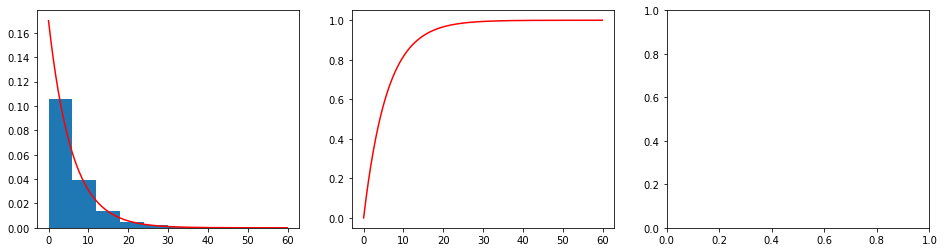

In [134]:
fig, a = plt.subplots(1,3, figsize = (16,4))

X = expon.rvs(loc,scale,len(df.Magnitude))
a[0].hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
a[0].plot(x, expon.pdf(x, loc, scale),color=("red"))
a[1].plot(x, expon.cdf(x, loc, scale),color=("red"))

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [135]:
tab = pd.crosstab(df.Hemisfério,df.Type,normalize = True,margins=True)
tab

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
0,0.000043,0.000000,0.000000,0.000000,0.000043
Norte,0.447121,0.000085,0.006279,0.000000,0.453485
Sul,0.545148,0.000085,0.001196,0.000043,0.546472
All,0.992312,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [136]:
p = 44.712113+0.008543+0.627883+0.000000
print("A probabilidade de ocorrer um terremoto no Norte é:",p,"%")

A probabilidade de ocorrer um terremoto no Norte é: 45.348539 %


Explique o seu raciocínio

In [137]:
print("a probabilidade é definida a partir da soma de todas as probabilidades de ocorrencia de abalos presentes na parte norte da crosstab gerada")

a probabilidade é definida a partir da soma de todas as probabilidades de ocorrencia de abalos presentes na parte norte da crosstab gerada


### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [138]:
print("A probabilidade de ter sido é de:",0.627883/45.348539,"%")

A probabilidade de ter sido é de: 0.013845716176214629 %


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

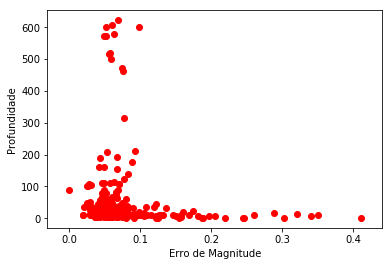

In [139]:
plt.scatter(df['Magnitude Error'],df["Depth"],color=("red"))
plt.xlabel("Erro de Magnitude")
plt.ylabel("Profundidade")

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [141]:
df["Magnitude Error"].corr(df["Depth"])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

In [142]:
print("o valor  correlação encontrado indica que a relção entre as duas variaveis é praticamente inexistente")

o valor  correlação encontrado indica que a relção entre as duas variaveis é praticamente inexistente


## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

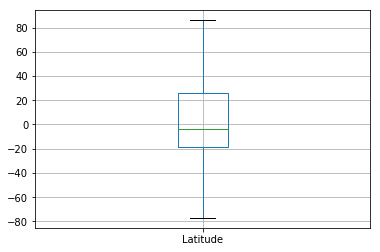

In [146]:
df.Latitude.describe()
df.boxplot(column="Latitude")

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [154]:
#hemisferio norte
norte = df[df.Hemisfério == "Norte"]
tabelanorte = pd.crosstab(norte["Type"],norte["Magnitude Type"],normalize=True)
tabelanorte


Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Type,,,,,,,,,,
Earthquake,0.145751,0.000565,0.000471,0.006124,0.072169,0.347089,0.104767,0.22508,0.001131,0.082815
Explosion,0.000188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Nuclear Explosion,0.012719,0.000000,0.000000,0.001131,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [155]:
#hemisferio sul
sul = df[df.Hemisfério == "Sul"]
tabelasul = pd.crosstab(sul["Type"],sul["Magnitude Type"],normalize = True)
tabelasul

Magnitude Type,MB,MS,MW,MWB,MWC,MWR,MWW
Type,,,,,,,
Earthquake,0.159997,0.073081,0.315617,0.105206,0.256292,0.001094,0.08629
Explosion,0.000156,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Nuclear Explosion,0.002189,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Rock Burst,0.000000,0.000000,0.000000,0.000000,0.000078,0.000000,0.00000


In [163]:
P_sul = tabelasul.iat[2,0] 
tabelasul
P_norte = tabelanorte.iat[2,0] 
tabelanorte
print("Probabilidade de abalos do tipo MB e Nuclear explosion:\nno sul é : {1}%\nno norte é: {0}%".format((P_norte*100),(P_sul*100)))

Probabilidade de abalos do tipo MB e Nuclear explosion:
no sul é : 0.21885258715022668%
no norte é: 1.2719050310910118%


In [164]:
print("é mais provavel que ocorra no norte")

é mais provavel que ocorra no norte
